## Chapter 3: First order methods

# 3.3  The geometric anatomy of lines and hyperplanes

In this Section we describe important geometric characteristics of the *hyperplane* including the concept of the *direction of steepest ascent* and *steepest descent*.  In particular we detail how to construct complex hyperplanes from relatively simple parts.  Along the way we will also see several important concepts - most notably the idea of the *direction of steepest ascent* arises naturally from the notion of slope.  These concepts are fundamental to the notion of multi-input derivatives (the gradient), and thus by extension gradient descent.

In [1]:
## This code cell will not be shown in the HTML version of this notebook
# imports from standard libraries and autograd
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
import autograd.numpy as np
import time

# import from custom libraries
from mlrefined_libraries import calculus_library as callib
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import linear_algebra_library as linlib

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# center all images in notebook and associated html
from IPython.display import HTML
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
    width="400";
    height="400";
}
</style>
"""))

## 3.3.1  Single input hyperplanes 

The formula for a line 

\begin{equation}
g(w) = a + bw
\end{equation}

tells us - for specific choices of $a$ and $b$ - are the point at which it strikes or intersects the vertical axis (given by $a$) and the steepness or *slope* of that line (given by the coefficient $b$).  We illustrate two simple examples of a line below.

<IPython.core.display.Javascript object>


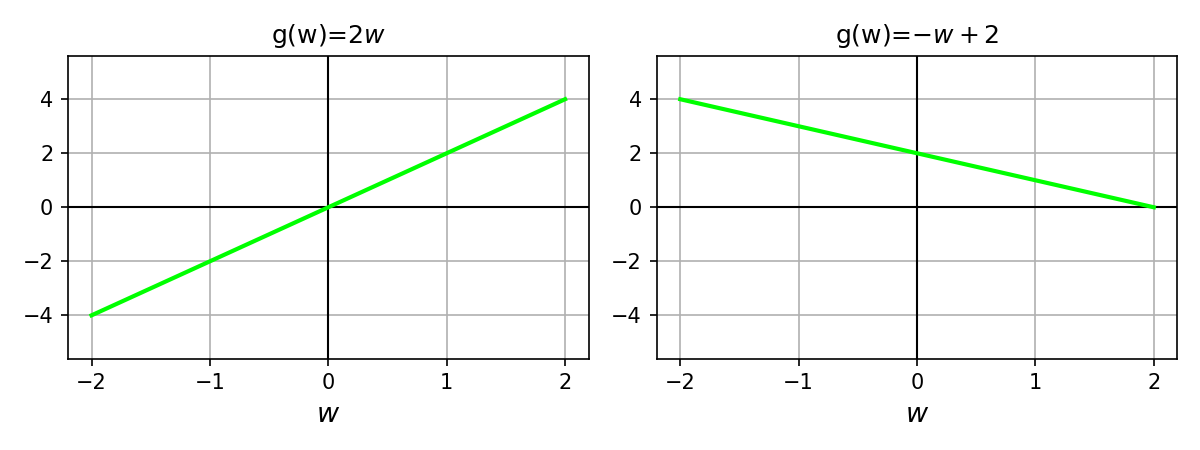

In [2]:
# This code cell will not be shown in the HTML version of this notebook
# create two quadratic functions
func1 = lambda w: 2*w
func2 = lambda w: -w + 2

# use custom plotter to show both functions
title1 = '$g(w)=$2w$'; title2 = '$g(w)=$-w+2$';
callib.plotter.double_2d_plot(func1 = func1, func2 = func2,title1 = title1,title2=title2,fontsize = 13,color = 'lime')

We can visualize the slope of a single line using a horizontal vector with magnitude $b$, which we show in the animation below in black.  As a direction the slope is often referred to as the *direction of steepest ascent* - since it tells us the direction we must travel on the line to increase its value the fastest.  

\begin{equation}
\text{steepest ascent direction of a line} = \text{its slope} \,\, b.
\end{equation}

This vector provides a simple visualization of a) the direction in which the line is increasing and b) how quickly it is increasing in this direction.  

Notice how that - by the same logic - the value $-b$ provides the direction of steepest *descent* on the line.  We also show this direction as a red vector in the animation.

\begin{equation}
\text{steepest descent direction of a line} = \text{its negative slope} \,\, -b.
\end{equation}

In [3]:
# This code cell will not be shown in the HTML version of this notebook
# animate 2d slope visualizer
func = lambda w: 2 + 3*w
callib.slope_visualizer.animate_visualize2d(func = func,num_frames = 100,savepath='videos/animation_1.mp4',fps=10)

# load video into notebook
from IPython.display import HTML
HTML("""
<video width="1000" height="400" controls loop>
  <source src="videos/animation_1.mp4" type="video/mp4">
  </video>
""")

---

In three dimensions - where we have two input variables $w_1$ and $w_2$ - we can form a similar equation using a single input.  For example, the formula

\begin{equation}
g(w_1,w_2) = a + bw_1
\end{equation}

takes in the first input $w_1$ and treats it like a line, outputting $a + bw_1$.  We can still say that this hyperplane - like the corresponding line - has a steepness or slope given by $b$.  The only difference is that this steepness is now defined over a two dimensional input space.

However in three-dimensions this is not just a line - its a line in $w_1$ stretched along the $w_2$ input dimension - forming a *hyperplane*.  

We plot the two and three dimensional versions of the line $g(w_1,w_2) = 2-w_1$ side by side below.   

<IPython.core.display.Javascript object>


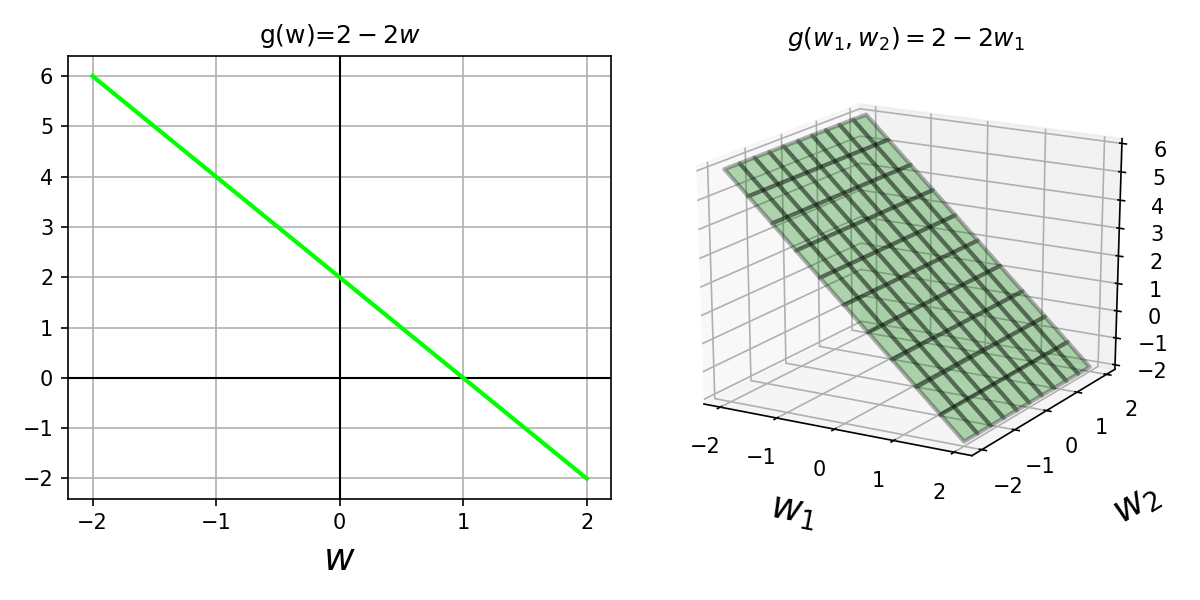

In [4]:
# This code cell will not be shown in the HTML version of this notebook
# plot a single input quadratic in both two and three dimensions
func1 = lambda w: 2-2*w 
func2 = lambda w: 2-2*w[0] 

# use custom plotter to show both functions
title1 = '$g(w)=$2-2w$'; title2 = '$g(w_1,w_2)=2-2w_1$';
callib.plotter.double_2d3d_plot(func1 = func1, func2 = func2,title1 = title1,title2=title2,fontsize = 18,color = 'lime')

Like the single input / one dimensional example, here we can visualize the *directions of steepest ascent and descent* - given by this individual direction slope of the hyperplane - as a vector in the input space.  Of course here the input space is two-dimensional, hence the vector has two entries.  

For example, with the previous example of $g(w_1,w_2) = 2-2w_1$ the ascent direction is $\left(b_1,0\right) = (-2,0)$ and descent direction $-\left(b_1,0\right) = (2,0)$.  We animate a hyperplane and these vectors - the ascent vector colored blue, the descent color in red - along a range of values for $b_1$ beginning with $b_1 = -2$  below.

In [5]:
# This code cell will not be shown in the HTML version of this notebook
# define hyperplane
func = lambda w:  2-2*w[0]

# animate 2d slope visualizer
callib.slope_visualizer.animate_visualize3d(func=func,num_frames=100,savepath='videos/animation_2.mp4',fps=10)

# load video into notebook
from IPython.display import HTML
HTML("""
<video width="1000" height="400" controls loop>
  <source src="videos/animation_2.mp4" type="video/mp4">
  </video>
""")

And of course we can define this single input hyperplane along any dimension we want.  In general if we have $N$ possible inputs $\mathbf{w}=[w_1,\,\,w_2,\,\,\cdots\,w_N]$ we can define it along the $n^{th}$ dimension as $g(\mathbf{w}) = a + bw_n$.

## 3.3.2  Constructing general hyperplanes when $N=2$

With multiple inputs we can form more complex hyperplanes by summing up a number of single input ones like those discussed above.  For example, with $N=2$ inputs if we form the two single input hyperplanes

\begin{array}
\
g_1(w_1,w_2) = a_1 +  b_1 w_1   \\
g_2(w_1,w_2) = a_2 +  b_2 w_2   \\
\end{array}

one along each input dimension.  Adding these together gives us a more complex hyperplane $g(w_1,w_2) = g_1(w_1,w_2) + g_2(w_1,w_2)= \left( a_1 + a_2 \right) + b_1w_1 + b_2w_2$ that has a slope along each input dimension explicitly controlled by its corresponding single input hyperplane (Likewise the vertical intercept is the sum of those of the single input hyperplanes).

For example, in the next Python cell we plot the following single input hyperplanes

\begin{array}
\
g_1(w_1,w_2) = 1-2w_1 \\
g_2(w_1,w_2) = 1 + 2w_2 \\
\end{array}

as well as their sum $g(w_1,w_2) = 2 - 2w_1 + 2w_2$  This creates a more complicated hyperplane with a vertical intercept of $+2$ and a new direction of steepest ascent which is the sum of those of each individual hyperplane: along the $w_1$ direction of steepest ascent is $\left(b_1,0\right) = (-2,0)$, along $w_2$ it is $(0,b_2) = (0,2)$ and so the direction of steepest descent for the complex hyperplane is $\left(b_1,b_2\right) = (-2,2)$.  Likewise its direction of steepest descent is just the negative of this: $-\left(b_1,b_2\right) = (2,-2)$

Below we plot $g_1$, $g_2$, and $g_1 + g_2$ in the left, middle, and right panels respectively.  The direction of steepest ascent in each individual dimension hyperplane is illustrated as a blue vector and descent vector in red in the left two panels, while the direction of steepest ascent is shown in black in the right panel with the complex hyperplane.

<IPython.core.display.Javascript object>


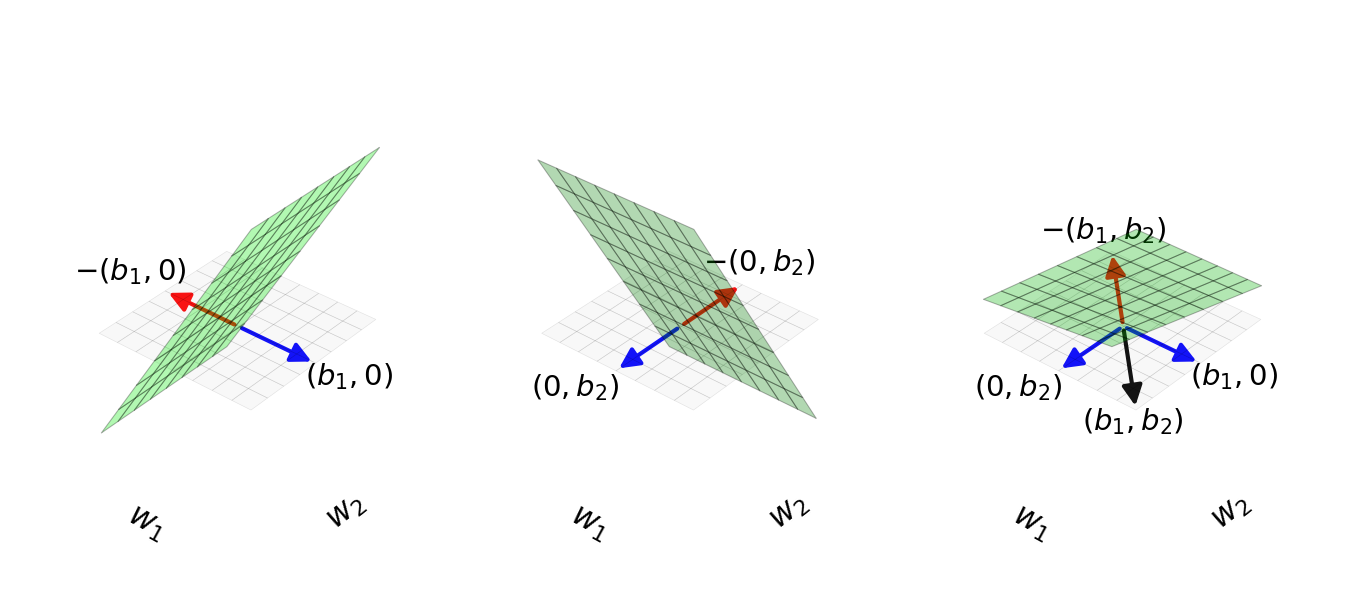

In [6]:
# This code cell will not be shown in the HTML version of this notebook
# plot a single input quadratic in both two and three dimensions
func1 = lambda w: 1 + 2*w[0] 
func2 = lambda w: 1 - 2*w[1] 
func3 = lambda w: 2 + 2*w[0] -2*w[1]  

# use custom plotter to show both functions
view = [25,-50]
callib.slope_visualizer.visualize3d(func1 = func1,func2=func2,func3=func3,view = view)

Below we animate a range of complex hyperplanes starting with

\begin{equation}
g(w_1,w_2) = 2 -2w_1 -2w_2 
\end{equation}

along with the direction of steepest ascent and descent colored black and red respectively. 

In [7]:
# This code cell will not be shown in the HTML version of this notebook
# define hyperplane
func = lambda w:  2 -2*w[0] - 2*w[1] 

# animate 2d slope visualizer
callib.slope_visualizer.animate_visualize3d(func=func,num_frames=100,savepath='videos/animation_3.mp4',fps=10)

# load video into notebook
from IPython.display import HTML
HTML("""
<video width="1000" height="400" controls loop>
  <source src="videos/animation_3.mp4" type="video/mp4">
  </video>
""")

---

The simple method detailed above for constructing multi-input hyperplanes can be used to produce every possible multi-input hyperplane in two dimensions.  

The analogous procedure can also generate every possible hyperplane in higher dimensions as well.

More generally for $N$ dimensional input we can define a single input hyperplane along each dimension

\begin{array}
\
g_1(\mathbf{w}) = a_1 + b_1 w_1  \\
g_2(\mathbf{w}) = a_2 + b_2w_2   \\
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \vdots \\
g_N(\mathbf{w}) = a_N + b_N w_N \\
\end{array}

and summing them up as $g(\mathbf{w}) = \sum_{n=1}^N g_n(\mathbf{w})$ gives - collecting terms

\begin{equation}
g(\mathbf{w}) = (a_1 + a_2  + \cdots a_N)  +  (b_1 w_1 + b_2 w_2 + \cdots b_N w_N) 
\end{equation}

We can write this formula more compactly using vector notation. Denoting the constant as

\begin{equation}
a = \sum_{n=1}^{N} a_n
\end{equation}

and the $\mathbf{b}$ the $N\times 1$ vector

\begin{equation}
\mathbf{b} = 
\begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_N
\end{bmatrix}
\end{equation}

we have our hyperplane written as 

\begin{equation}
g(\mathbf{w}) = a + \mathbf{w}^T\mathbf{b}
\end{equation}

Such an $N$ dimensional hyperplane has a direction of steepest ascent given by $\mathbf{b}$.  By the same logic, the vector $-\mathbf{b}$ gives the direction of steepest *descent*, or the fastest way to move downward on the hyperplane.

Notice here that since the general hyperplane is made by adding simpler ones, each defined along a single input, that each individual slope defines a steepest ascent direction along its respective input axis (i.e., the direction we travel in - if only allowed to move along a single axis - that increases the value of the hyperplane the fastest)

\begin{equation}
\text{steepest ascent direction along $n^{th}$ axis} = \text{$n^{th}$ slope parameter} \,\, b_n.
\end{equation}

Likewise, the negative value of each slope parameter defines the steepest descent direction along each coordinate axis (i.e., the direction we travel along a single input axis that *decreases* the value of the hyperplane the fastest)

\begin{equation}
\text{steepest descent direction along $n^{th}$ axis} = \text{$n^{th}$ negative slope parameter} \,\, - b_n.
\end{equation}

But of course since our general hyperplane is more complicated than one defined along just a single input axis, it is the combination of its slope values that defines its direction of steepest ascent / descent.  As illustrated above, the vector of slope values $\mathbf{b}$ defines the steepest ascent direction with respect to the *entire* input space for the hyperplane.

\begin{equation}
\text{steepest ascent direction} = \text{entire vector of slope parameters} \,\, \mathbf{b}.
\end{equation}

Likewise, the steepest descent direction with respect to the entire input space is given by the negative of our slope vector

\begin{equation}
\text{steepest descent direction} = \text{negative entire vector of slope parameters} \,\, - \mathbf{b}.
\end{equation}

## 3.3.3 Representing hyperplanes via normal vectors

The constructive perspective on hyperplanes discussed in the previous Section led to formation of equation (9) for a  hyperplane in $N+1$ dimensions. Here we adopt a new geometric perspective to represent a hyperplane in a different (but equivalent) way via its *normal vector*, that is, a vector perpendicular to the hyperplane. Figure 1 shows a hyperplane along with its normal vector $\mathbf{v}$ piercing the hyperplane at

\begin{equation}
\mathbf{p}_{1}=\left[\begin{array}{c}
\mathbf{w}_{1}\\
g_{1}
\end{array}\right]
\end{equation}

<figure>
<img src= '../../mlrefined_images/math_optimization_images/normal_vector.png' width="95%" height="100%"/>
  <figcaption>   
<strong>Figure 1:</strong> <em> The normal vector $\mathbf{v}$ is perpendicular to all objects inside a hyperplane, including the line segment connecting its intersection with the hyperplane at $\mathbf{p}_1$ to any point $\mathbf{p}$ in the hyperplane.  
</em>  </figcaption> 
</figure>

The normal vector, by definition, is perpendicular to every 'object' living inside the hyperplane: this includes every line that connects $\mathbf{p}_1$ to any other point in the hyperplane. Let 

\begin{equation}
\mathbf{p}=\left[\begin{array}{c}
\mathbf{w}\\
g\left(\mathbf{w}\right)
\end{array}\right]
\end{equation}

be a generic point in the hyperplane. The fact that $\mathbf{p}-\mathbf{p}_1$ is perpendicular to $\mathbf{v}$ (as shown in Figure 1) allows us to write 

\begin{equation}
\left(\mathbf{p}-\mathbf{p}_1\right)^T\mathbf{v}=0
\end{equation}

or 

\begin{equation}
\mathbf{p}^T\mathbf{v}=\mathbf{p}_1^T\mathbf{v}
\end{equation}

Denoting the first $N$ entries of $\mathbf{v}$ by $\mathbf{v}_{1:N}$, this can be rewritten as    

\begin{equation}
\mathbf{w}^T\mathbf{v}_{1:N}+g\left(\mathbf{w}\right)v_{N+1} = \mathbf{w}_1^T\mathbf{v}_{1:N} + g_1v_{N+1} 
\end{equation}

Notice, by setting 

\begin{equation}
a = \frac{\mathbf{w}_1^T\mathbf{v}_{1:N} + v_{N+1}g_1}{v_{N+1}} 
\end{equation}

and 

\begin{equation}
\mathbf{b} = -\frac{\mathbf{v}_{1:N}}{v_{N+1}}
\end{equation}



we arrive at the equation of the hyperplane in (9), with a small caveat: $a$ and $\mathbf{b}$ in (19) and (20) cannot be defined if $v_{N+1}=0$. This only happens when the hyperplane is in parallel with the $g\left(\mathbf{w}\right)$ axis. Therefore - in the most general case - we can represent the equation of a hyperplane via parameters $\boldsymbol{\alpha}$, $\beta$, and $\gamma$, as 

\begin{equation}
\mathbf{w}^T\boldsymbol{\alpha}+g\left(\mathbf{w}\right)\beta +\gamma= 0
\end{equation}

where $
\left[\begin{array}{c}
\boldsymbol{\alpha}\\
\beta
\end{array}\right]$
is the normal vector.